In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Data
df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# Labeling Columns
le=LabelEncoder()
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])
df['Urban']=le.fit_transform(df['Urban'])
df['US']=le.fit_transform(df['US'])

In [6]:
# Assign Buckets
df=df.assign(Sale=pd.cut(df['Sales'],bins=[0,5,9,16],labels=['Low','Medium','High']))

In [7]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Medium


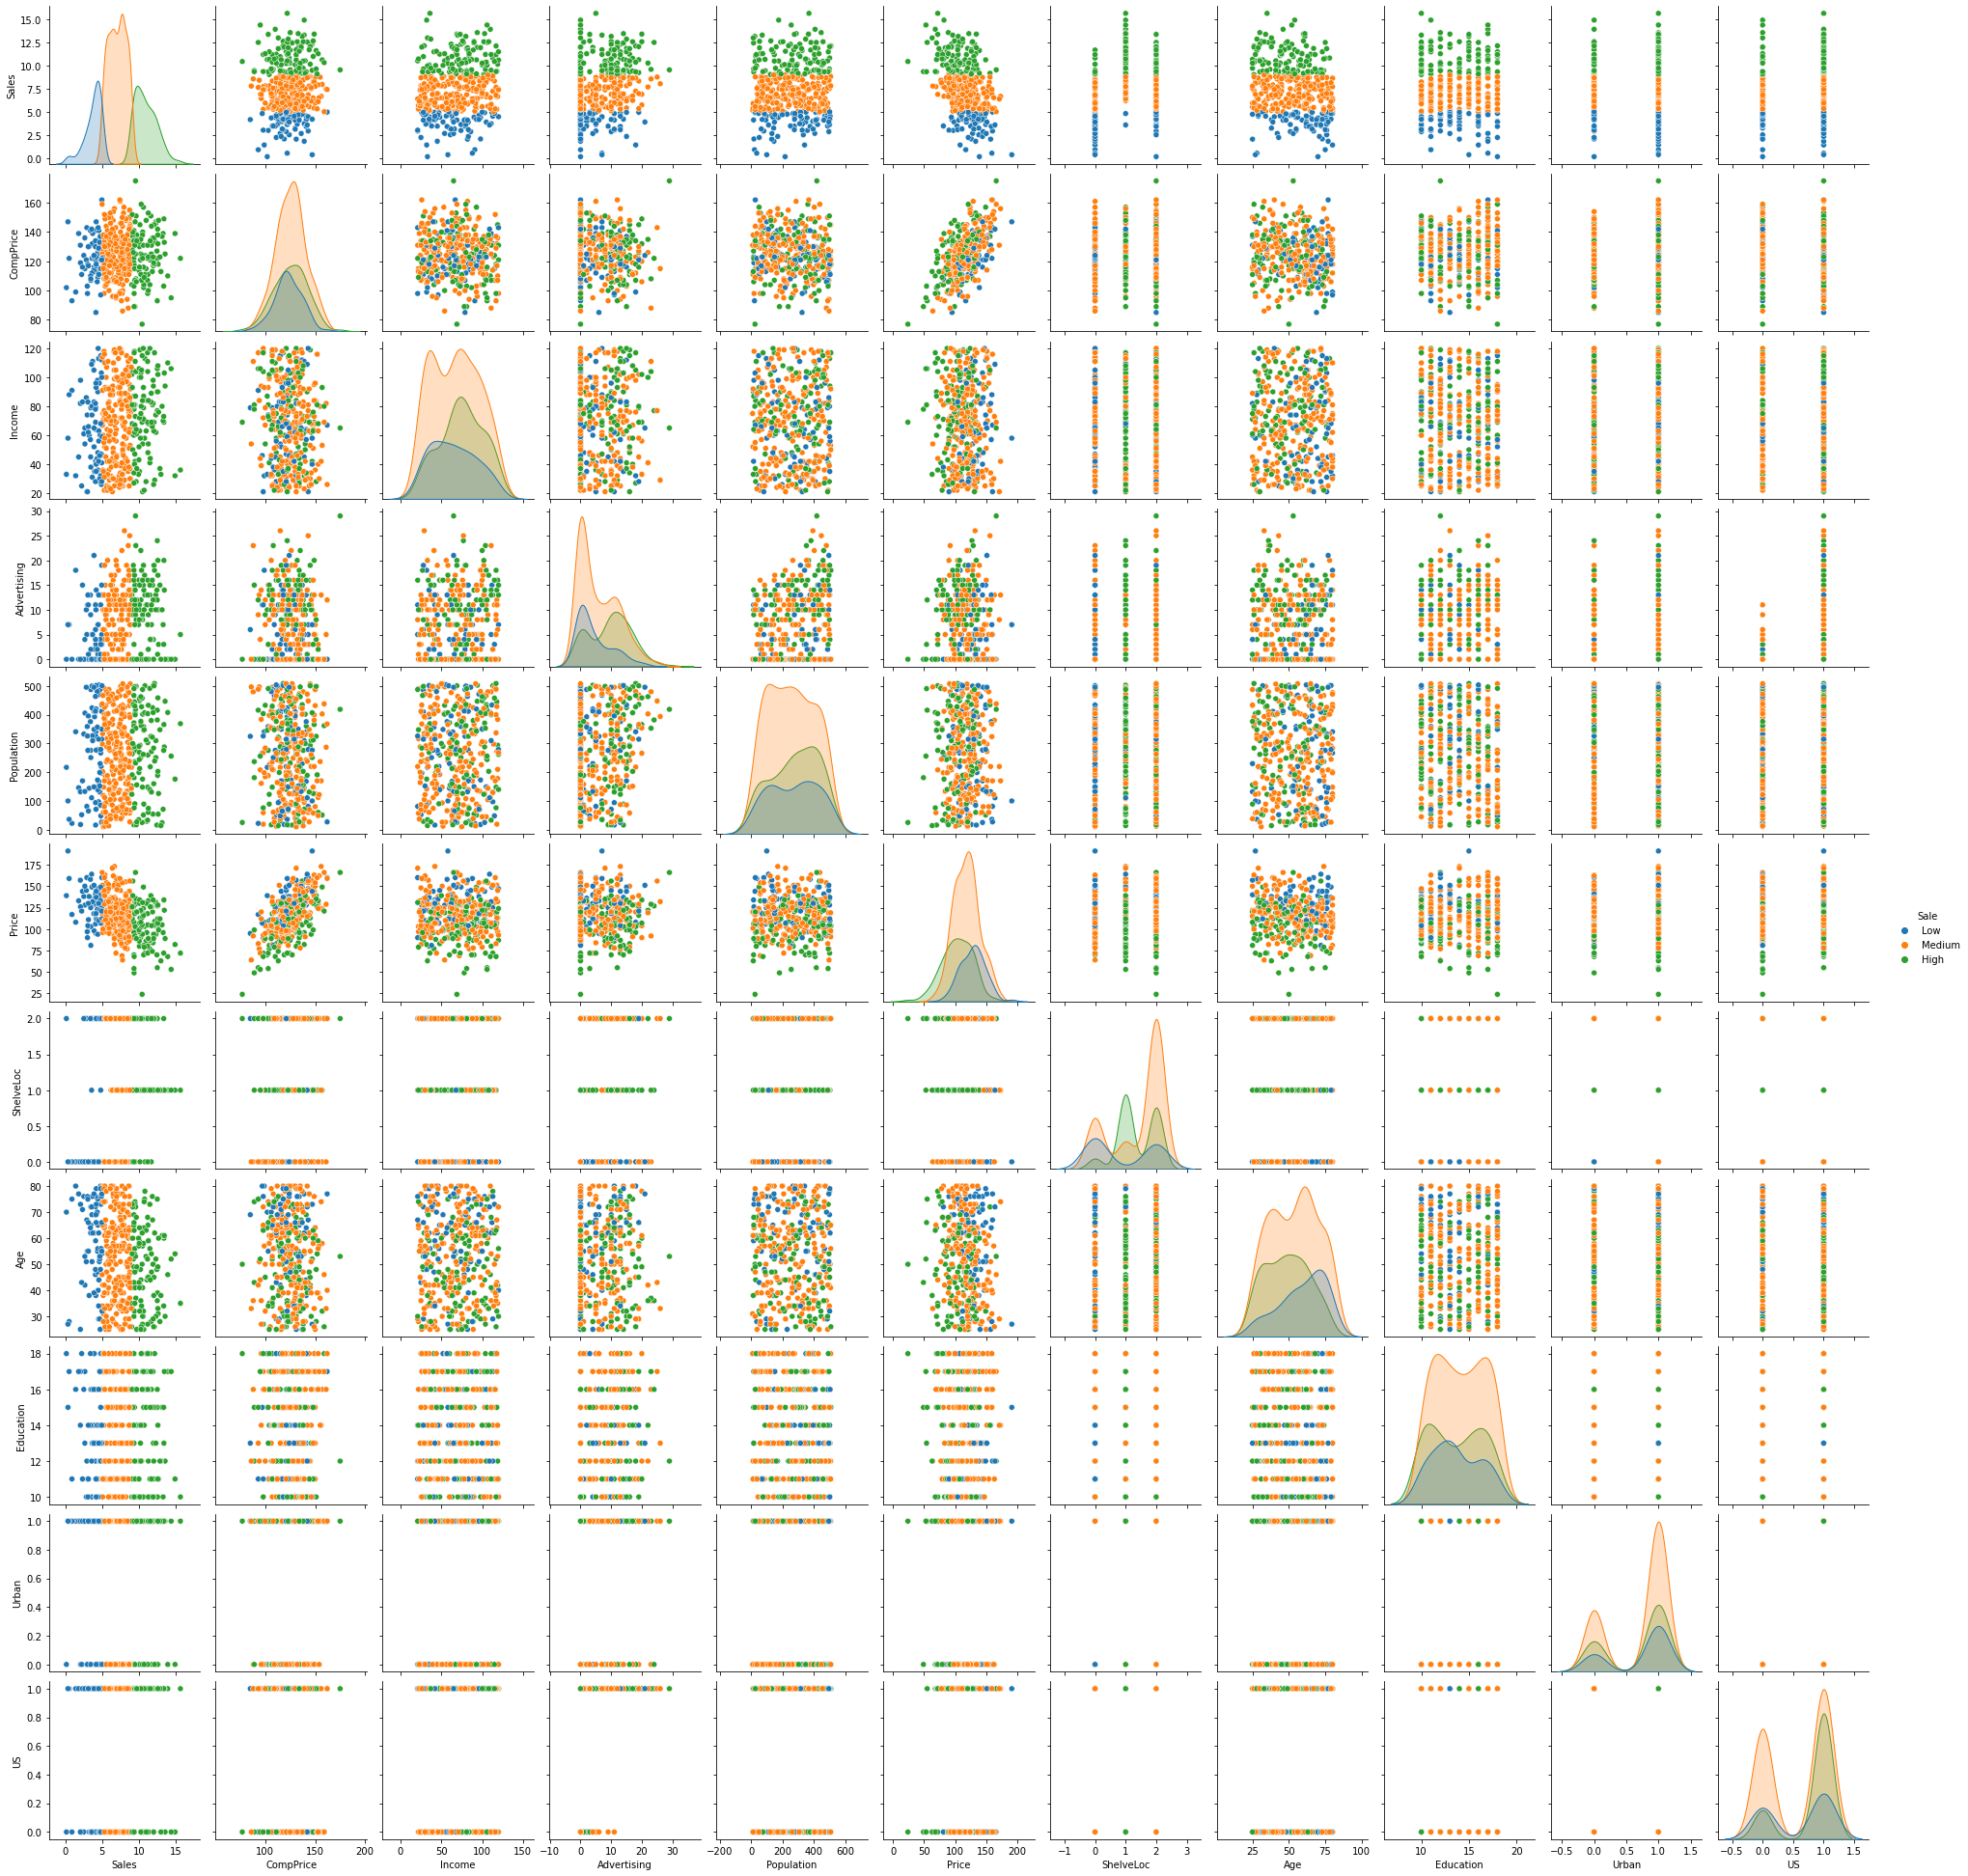

In [8]:
sns.pairplot(data=df,hue='Sale')

<AxesSubplot:>

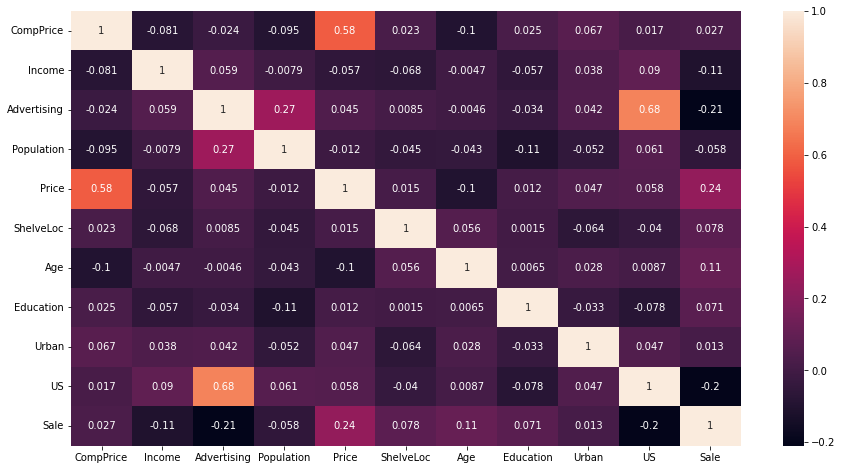

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Sale', ylabel='count'>

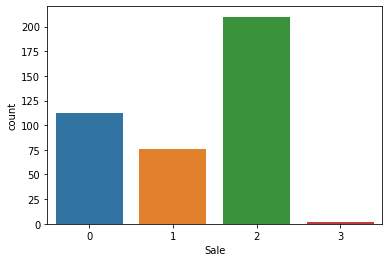

In [32]:
sns.countplot(df['Sale'])

In [10]:
#Dropping column
df.drop(columns=['Sales'],inplace=True)
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,138,73,11,276,120,0,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,Medium
4,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,Medium
397,162,26,12,368,159,2,40,18,1,1,Medium
398,100,79,7,284,95,0,50,12,1,1,Medium


In [11]:
# Labeling 
df['Sale']=le.fit_transform(df['Sale'])
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,2
397,162,26,12,368,159,2,40,18,1,1,2
398,100,79,7,284,95,0,50,12,1,1,2


# Model Building

In [12]:
# Assigning x and y variable
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import  train_test_split

In [14]:
# Spitting data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.25,random_state=1)

In [15]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [16]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

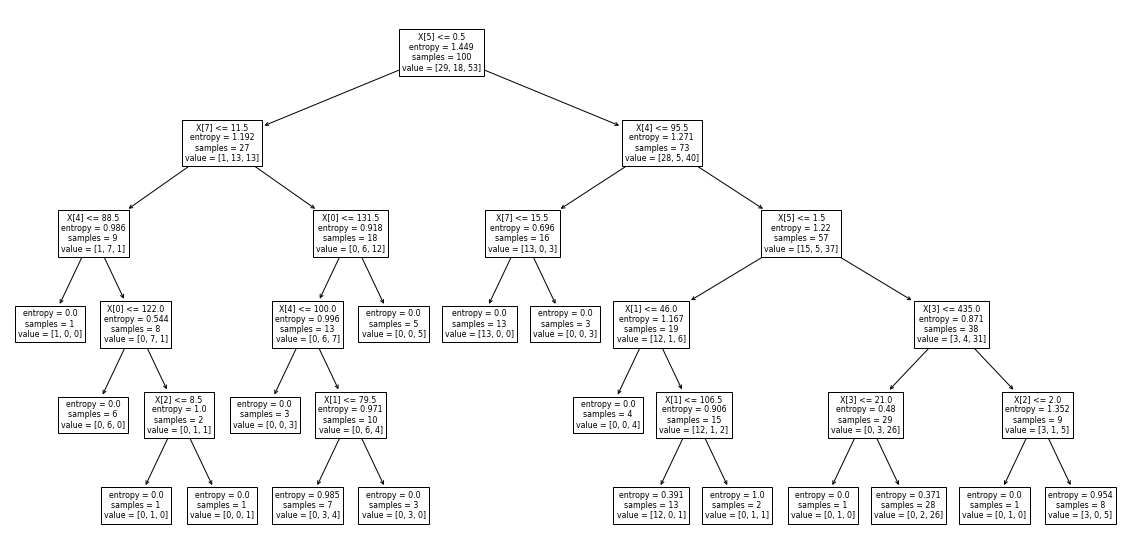

In [17]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model)
plt.show()

In [18]:
y_pred=model.predict(xtest)

In [19]:
trainac=model.score(xtrain,ytrain)
testac=model.score(xtest,ytest)
print(f"Testing Accuracy {trainac}\nTesting Accuracy {testac}")

Testing Accuracy 0.9
Testing Accuracy 0.5666666666666667


# HyperParameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
parameter={ 'criterion':['entropy','gini'],
           'max_depth':[1,2,3,4,5],
           'random_state':[1,10,100,1000],
           'max_features':['auto','sqrt','log2']
    
    
}

In [22]:
cv=GridSearchCV(model,param_grid=parameter,cv=5,scoring='accuracy')

In [23]:
cv.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [1, 10, 100, 1000]},
             scoring='accuracy')

In [24]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'random_state': 10}

In [25]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=4,max_features='auto',random_state=10)

In [26]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=10)

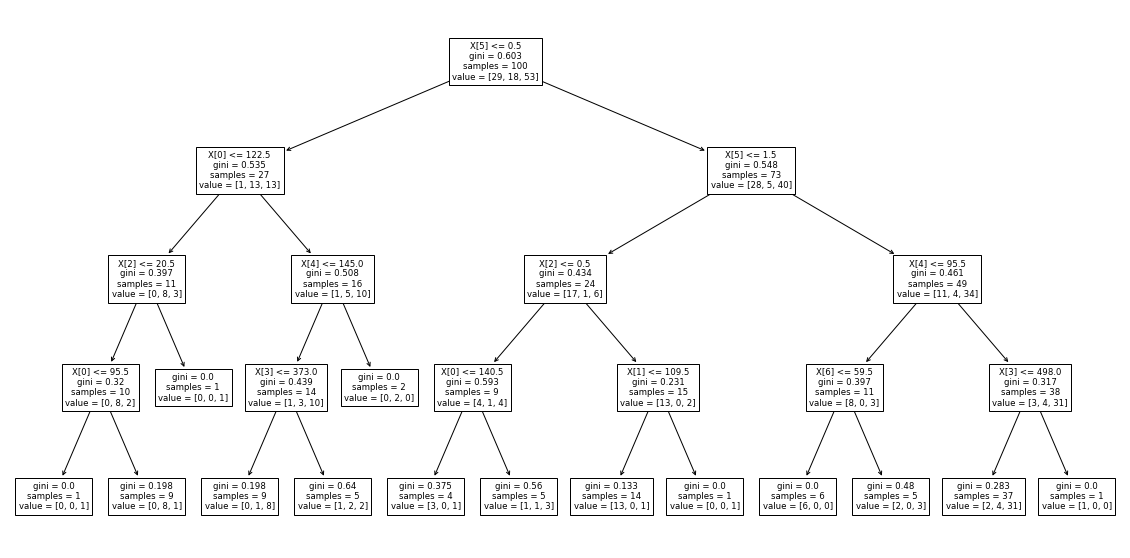

In [27]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model2)
plt.show()

In [28]:
y_pred2=model2.predict(xtest)


In [29]:
trainac=model2.score(xtrain,ytrain)
testac=model2.score(xtest,ytest)
print(f"Testing Accuracy {trainac}\nTesting Accuracy {testac}")

Testing Accuracy 0.83
Testing Accuracy 0.5833333333333334
